In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
%matplotlib inline


In [2]:
# Data Files
file_path = "group3_resources\SpotifyFeatures.csv"

#Load Data
orignal_df = pd.read_csv(file_path)
orignal_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
orignal_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [4]:
len(orignal_df)

232725

In [5]:
orignal_df['artist_name'].nunique()

14564

In [6]:
orignal_df['track_name'].nunique()

148615

In [7]:
orignal_df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [8]:
orignal_df['genre'].nunique()

27

In [9]:
group_df = orignal_df.groupby(["genre",]).count()
group_df = group_df.sort_values(["track_name"], ascending=False)
group_df

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
Comedy,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681
Soundtrack,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646,9646
Indie,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543,9543
Jazz,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441,9441
Pop,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386
Electronic,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377
Children’s Music,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353,9353
Folk,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299,9299
Hip-Hop,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295


In [10]:
group_df['artist_name'].sum()

232725

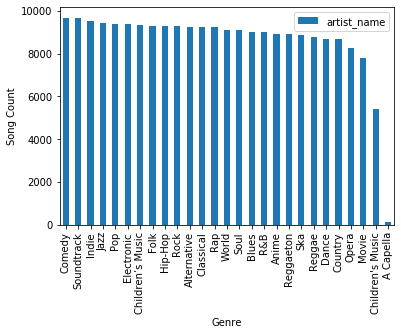

<Figure size 432x288 with 0 Axes>

In [11]:
#How many songs by Genre
drop_these = ['track_name', 'loudness','track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
genre_song_count = group_df.drop(columns = drop_these)
genre_song_chart = genre_song_count.plot(kind='bar')

genre_song_chart.set_xlabel('Genre')
genre_song_chart.set_ylabel("Song Count")

plt.show()
plt.tight_layout()

In [12]:
#Are there dupicates by artist, genre and track name
group_df = orignal_df.groupby(["artist_name", "genre", "track_name"]).count()
group_df = group_df.sort_values(["track_id"], ascending=False)
group_df

track_id  \
artist_name                       genre       track_name                                                     
!!!                               Alternative Even When The Water's Cold                                 1   
Orion Sun                         Alternative Antidote                                                   1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                               1   
                                              So In Love                                                 1   
                                  Rock        Enola Gay - Remastered                                     1   
...                                                                                                    ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 2. Req...         1   
                                              Verdi: Messa da Requiem: VII. Libera me, 3. Lib...         1   
정진우                               R&B         I'll Find You (feat. June)                                 1   

                                                                                                  popularity  \
artist_name                       genre       track_name                                                       
!!!                               Alternative Even When The Water's Cold                                   1   
Orion Sun                         Alternative Antidote                                                     1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                                 1   
                                              So In Love                                                   1   
                                  Rock        Enola Gay - Remastered                                       1   
...                                                                                                      ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 2. Req...           1   
                                              Verdi: Messa da Requiem: VII. Libera me, 3. Lib...           1   
정진우                               R&B         I'll Find You (feat. June)                                   1   

                                                                                                  acousticness  \
artist_name                       genre       track_name                                                         
!!!                               Alternative Even When The Water's Cold                                     1   
Orion Sun                         Alternative Antidote                                                       1   
Orchestral Manoeuvres In The Dark Dance       If You Leave                                                   1   
                                              So In Love                                                     1   
                                  Rock        Enola Gay - Remastered                                         1   
...                                                                                                        ...   
Giuseppe Verdi                    Opera       Verdi: Messa da Requiem: VI. Communion - Lux ae...             1   
                                              Verdi: Messa da Requiem: VII. Libera me, 1. Lib...             1   
                                              Verdi: Messa da Requiem:

In [13]:
#Before I get rid of duplicates, if a track has duplicated genres does that contribute to it's popularity?
group_df = orignal_df.groupby(["popularity", "artist_name", "track_name"]).count()
group_df2 = group_df.sort_values(["popularity", "genre"], ascending=False)
group_df2

genre  \
popularity artist_name   track_name                                        
100        Ariana Grande 7 rings                                       2   
99         Ariana Grande break up with your girlfriend, i'm bored      2   
           Post Malone   Wow.                                          2   
98         Daddy Yankee  Con Calma                                     3   
97         Halsey        Without Me                                    3   
...                                                                  ...   
0          graves        Exhale                                        1   
                         Glass Hearts (How Much You Mean)              1   
                         Intro                                         1   
           大原ゆい子         チャンス -Instrumental-                           1   
                         ラブビーム中 -Instrumental-                         1   

                                                                   track_id  \
popularity artist_name   track_name                                           
100        Ariana Grande 7 rings                                          2   
99         Ariana Grande break up with your girlfriend, i'm bored         2   
           Post Malone   Wow.                                             2   
98         Daddy Yankee  Con Calma                                        3   
97         Halsey        Without Me                                       3   
...                                                                     ...   
0          graves        Exhale                                           1   
                         Glass Hearts (How Much You Mean)                 1   
                         Intro                                            1   
           大原ゆい子         チャンス -Instrumental-                              1   
                         ラブビーム中 -Instrumental-                            1   

                                                                   acousticness  \
popularity artist_name   track_name                                               
100        Ariana Grande 7 rings                                              2   
99         Ariana Grande break up with your girlfriend, i'm bored             2   
           Post Malone   Wow.                                                 2   
98         Daddy Yankee  Con Calma                                            3   
97         Halsey        Without Me                                           3   
...                                                                         ...   
0          graves        Exhale                                               1   
                         Glass Hearts (How Much You Mean)                     1   
                         Intro                                                1   
           大原ゆい子         チャンス -Instrumental-                                  1   
                         ラブビーム中 -Instrumental-                                1   

                                                                   danceability  \
popularity artist_name   track_name                                               
100        Ariana Grande 7 rings                                              2   
99         Ariana Grande break up with your girlfriend, i'm bored             2   
           Post Malone   Wow.                                                 2   
98         Daddy Yankee  Con Calma                                            3   
97         Halsey        Without Me                                           3   
...                                                                         ...   
0          graves        Exhale                                               1   
                         Glass Hearts (How Much You Mean)                     1   
                         Intro                                                1   
           大原ゆい子         チャンス -Instrumental-             

In [14]:
group_df2.to_csv(r'group3_resources\carol_test.csv', index = True, header = True)
#Exported file because I had an idea that I wanted to do and thought this woud help execute it but I didn't have to do it. Left it anyway.

In [15]:
# Data Files 
file_path = "group3_resources\carol_test.csv"

#Load Data
genre_counts_df = pd.read_csv(file_path)
genre_counts_df.head()

,popularity,artist_name,track_name,genre,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,100,Ariana Grande,7 rings,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,99,Ariana Grande,"break up with your girlfriend, i'm bored",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,99,Post Malone,Wow.,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,98,Daddy Yankee,Con Calma,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,97,Halsey,Without Me,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


The correlation between Number of Genre and popularity is 0.42


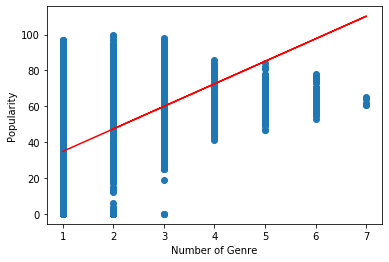

In [16]:
# I did a correlation chart to help see if there's any correlation between the number of genre's a song has vs popularity. 
x=genre_counts_df['genre']
y=genre_counts_df['popularity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x=genre_counts_df['genre'], y=genre_counts_df['popularity'])
plt.plot(x,regress_values,"r-")
plt.show
plt.ylabel("Popularity")
plt.xlabel("Number of Genre");

correlation = st.pearsonr(x,y)
print(f"The correlation between Number of Genre and popularity is {round(correlation[0],2)}")

In [17]:
#Wanted to see how many Genre's had a high popularity score
dfgroup = orignal_df.groupby(["popularity", "genre"]).count()
dfgroup


artist_name  track_name  track_id  acousticness  \
popularity genre                                                               
0          A Capella                  10          10        10            10   
           Alternative                 7           7         7             7   
           Anime                      36          36        36            36   
           Blues                      55          55        55            55   
           Children's Music         2966        2966      2966          2966   
...                                  ...         ...       ...           ...   
99         Dance                       1           1         1             1   
           Pop                         2           2         2             2   
           Rap                         1           1         1             1   
100        Dance                       1           1         1             1   
           Pop                         1           1         1             1   

                             danceability  duration_ms  energy  \
popularity genre                                                 
0          A Capella                   10           10      10   
           Alternative                  7            7       7   
           Anime                       36           36      36   
           Blues                       55           55      55   
           Children's Music          2966         2966    2966   
...                                   ...          ...     ...   
99         Dance                        1            1       1   
           Pop                          2            2       2   
           Rap                          1            1       1   
100        Dance                        1            1       1   
           Pop                          1            1       1   

                             instrumentalness   key  liveness  loudness  mode  \
popularity genre                                                                
0          A Capella                       10    10        10        10    10   
           Alternative                      7     7         7         7     7   
           Anime                           36    36        36        36    36   
           Blues                           55    55        55        55    55   
           Children's Music              2966  2966      2966      2966  2966   
...                                       ...   ...       ...       ...   ...   
99         Dance                            1     1         1         1     1   
           Pop                              2     2         2         2     2   
           Rap                              1     1         1         1     1   
100        Dance                            1     1         1         1     1   
           Pop                              1     1         1         1     1   

                             speechiness  tempo  time_signature  valence  
popularity genre                                                          
0          A Capella                  10     10              10       10  
           Alternative                 7      7               7        7  
           Anime                      36     36              36       36  
           Blues                      55     55              55       55  
           Children's Music         2966   2966            2966     2966  
...                                  ...    ...             ...      ...  
99         Dance                       1      1               1        1  
           Pop                         2      2               2        2  
           Rap                         1      1               1        1  
100        Dance                       1      1               1        1  
           Pop                         1      1               1        1  

[1832 rows x 16 columns]

In [18]:
#because there were so many rows, I exported the file to get a better idea of this.
dfgroup.to_csv(r'group3_resources\carol_test2.csv', index = True, header = True)

In [19]:
#wanted to see if there was any correlation between popularity and the other variables. Didn't drop duplicates
orignal_df.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


In [20]:
#wanted to see if there was any correlation between popularity and the other variables, drop duplicates
o2 = orignal_df.drop_duplicates(subset=["track_id"])
o2.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.359111,0.222052,0.019349,0.234068,-0.147899,-0.161714,0.321599,-0.162072,0.082825,0.048818
acousticness,-0.359111,1.000000,-0.379018,0.010294,-0.729884,0.305213,0.078869,-0.693157,0.172665,-0.260823,-0.348577
danceability,0.222052,-0.379018,1.000000,-0.124258,0.365232,-0.370872,-0.026899,0.460542,0.133137,0.046786,0.587601
duration_ms,0.019349,0.010294,-0.124258,1.000000,-0.029969,0.069618,0.023598,-0.042929,-0.011580,-0.030055,-0.146981
energy,0.234068,-0.729884,0.365232,-0.029969,1.000000,-0.391797,0.210485,0.824522,0.162432,0.241539,0.449565
instrumentalness,-0.147899,0.305213,-0.370872,0.069618,-0.391797,1.000000,-0.162712,-0.501382,-0.191648,-0.109288,-0.331214
liveness,-0.161714,0.078869,-0.026899,0.023598,0.210485,-0.162712,1.000000,0.057915,0.555547,-0.062021,0.005851
loudness,0.321599,-0.693157,0.460542,-0.042929,0.824522,-0.501382,0.057915,1.000000,0.000802,0.246279,0.426938
speechiness,-0.162072,0.172665,0.133137,-0.011580,0.162432,-0.191648,0.555547,0.000802,1.000000,-0.101591,0.018769
tempo,0.082825,-0.260823,0.046786,-0.030055,0.241539,-0.109288,-0.062021,0.246279,-0.101591,1.000000,0.159027


In [21]:
#wanted to see if there was any correlation between popularity and the other variables by genre, the group each took 4 genre's. 
o22 = o2.loc[o2["genre"] == "Folk"]
o22.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.006650,0.043331,-0.014897,0.021404,-0.066566,-0.071015,0.010531,-0.014634,-0.013390,0.026718
acousticness,0.006650,1.000000,-0.092364,-0.073758,-0.750075,0.070771,-0.103572,-0.604161,-0.037668,-0.092077,-0.324089
danceability,0.043331,-0.092364,1.000000,-0.140292,0.134979,-0.109830,-0.064450,0.083988,0.088696,-0.117391,0.448263
duration_ms,-0.014897,-0.073758,-0.140292,1.000000,0.029660,0.142140,0.034928,0.002784,-0.072774,0.003781,-0.198866
energy,0.021404,-0.750075,0.134979,0.029660,1.000000,-0.011877,0.162661,0.778747,0.140547,0.137577,0.474128
instrumentalness,-0.066566,0.070771,-0.109830,0.142140,-0.011877,1.000000,-0.035256,-0.154780,-0.041273,-0.004782,-0.133644
liveness,-0.071015,-0.103572,-0.064450,0.034928,0.162661,-0.035256,1.000000,0.094637,0.110500,0.012969,0.097855
loudness,0.010531,-0.604161,0.083988,0.002784,0.778747,-0.154780,0.094637,1.000000,0.042373,0.084364,0.267020
speechiness,-0.014634,-0.037668,0.088696,-0.072774,0.140547,-0.041273,0.110500,0.042373,1.000000,0.081146,0.114474
tempo,-0.013390,-0.092077,-0.117391,0.003781,0.137577,-0.004782,0.012969,0.084364,0.081146,1.000000,0.104964


In [22]:
o23 = o2.loc[o2["genre"] == "Indie"]
o23.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,0.140200,0.089794,-0.042777,-0.154737,-0.092453,-0.071660,-0.021888,0.005990,-0.059259,-0.046404
acousticness,0.140200,1.000000,-0.017114,-0.024767,-0.738818,0.059663,-0.090823,-0.596805,-0.037721,-0.120112,-0.285127
danceability,0.089794,-0.017114,1.000000,-0.197945,-0.035988,-0.084285,-0.066520,0.014543,0.115290,-0.231284,0.360778
duration_ms,-0.042777,-0.024767,-0.197945,1.000000,-0.000684,0.057825,-0.041794,-0.012046,-0.097734,0.043163,-0.218566
energy,-0.154737,-0.738818,-0.035988,-0.000684,1.000000,-0.040554,0.123148,0.776282,0.123451,0.167998,0.384634
instrumentalness,-0.092453,0.059663,-0.084285,0.057825,-0.040554,1.000000,0.014063,-0.223848,-0.100097,0.023272,-0.095656
liveness,-0.071660,-0.090823,-0.066520,-0.041794,0.123148,0.014063,1.000000,0.071593,0.079602,0.017989,0.053892
loudness,-0.021888,-0.596805,0.014543,-0.012046,0.776282,-0.223848,0.071593,1.000000,0.067288,0.114668,0.302275
speechiness,0.005990,-0.037721,0.115290,-0.097734,0.123451,-0.100097,0.079602,0.067288,1.000000,0.057415,0.042228
tempo,-0.059259,-0.120112,-0.231284,0.043163,0.167998,0.023272,0.017989,0.114668,0.057415,1.000000,0.044032


In [23]:
o24 = o2.loc[o2["genre"] == "Soul"]
o24.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.022565,0.052700,-0.029618,0.065390,0.033906,-0.062344,0.027569,-0.032173,-0.020130,0.049126
acousticness,-0.022565,1.000000,-0.220659,-0.107053,-0.577508,0.001695,-0.029553,-0.439977,-0.038679,-0.058058,-0.167759
danceability,0.052700,-0.220659,1.000000,-0.050274,0.143994,0.018231,-0.108125,0.074667,0.094433,-0.126410,0.339405
duration_ms,-0.029618,-0.107053,-0.050274,1.000000,0.052981,0.023825,0.014553,-0.047829,-0.084553,-0.008445,-0.030857
energy,0.065390,-0.577508,0.143994,0.052981,1.000000,0.030717,0.121518,0.689847,0.077049,0.084961,0.388467
instrumentalness,0.033906,0.001695,0.018231,0.023825,0.030717,1.000000,-0.040832,-0.103429,-0.068598,0.022823,-0.163614
liveness,-0.062344,-0.029553,-0.108125,0.014553,0.121518,-0.040832,1.000000,0.062630,0.072785,-0.005182,0.069268
loudness,0.027569,-0.439977,0.074667,-0.047829,0.689847,-0.103429,0.062630,1.000000,0.029700,0.060646,0.157334
speechiness,-0.032173,-0.038679,0.094433,-0.084553,0.077049,-0.068598,0.072785,0.029700,1.000000,0.051658,0.026122
tempo,-0.020130,-0.058058,-0.126410,-0.008445,0.084961,0.022823,-0.005182,0.060646,0.051658,1.000000,0.030900


In [24]:
#Worked on files that were by year realsed to see if there was an correlation. Year in this file refers to when it was released on spotify and not nessissarly a remake. 
# Data Files
file_path1 = "group3_resources/1950.csv"
file_path2 = "group3_resources/1960.csv"
file_path3 = "group3_resources/1970.csv"
file_path4 = "group3_resources/1980.csv"
file_path5 = "group3_resources/1990.csv"
file_path6 = "group3_resources/2000.csv"
file_path7 = "group3_resources/2010.csv"

#Load Data
fifty_df = pd.read_csv(file_path1)
sixty_df = pd.read_csv(file_path2)
seventy_df = pd.read_csv(file_path3)
eighty_df = pd.read_csv(file_path4)
ninty_df = pd.read_csv(file_path5)
two_thousand_df = pd.read_csv(file_path6)
tens_df = pd.read_csv(file_path7)


In [25]:
tens_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,-0.419685,-0.108064,0.423453,-0.069998,0.356519,0.104397,0.165425,0.067154,-0.246155,-0.185075,-0.874115
year,-0.419685,1.000000,0.026997,-0.404827,0.266851,-0.216683,-0.072513,-0.202528,-0.205454,0.240611,0.123326,0.352484
bpm,-0.108064,0.026997,1.000000,0.026813,-0.076467,-0.043644,-0.014262,-0.076299,-0.027527,-0.057103,0.079919,0.117333
nrgy,0.423453,-0.404827,0.026813,1.000000,0.061161,0.794119,0.174272,0.424567,-0.174527,-0.510088,-0.083491,-0.388912
dnce,-0.069998,0.266851,-0.076467,0.061161,1.000000,0.132524,0.045431,0.387219,-0.274811,-0.103396,0.002579,-0.008668
dB,0.356519,-0.216683,-0.043644,0.794119,0.132524,1.000000,0.069180,0.375732,-0.213595,-0.355173,-0.280863,-0.356269
live,0.104397,-0.072513,-0.014262,0.174272,0.045431,0.069180,1.000000,0.005110,0.137844,-0.183309,0.005708,-0.030804
val,0.165425,-0.202528,-0.076299,0.424567,0.387219,0.375732,0.005110,1.000000,-0.174337,-0.061060,-0.039430,-0.194638
dur,0.067154,-0.205454,-0.027527,-0.174527,-0.274811,-0.213595,0.137844,-0.174337,1.000000,0.052761,-0.050768,0.009269
acous,-0.246155,0.240611,-0.057103,-0.510088,-0.103396,-0.355173,-0.183309,-0.061060,0.052761,1.000000,0.115504,0.230120


In [26]:
two_thousand_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.097394,0.021156,0.164576,0.093872,0.005874,0.059948,0.144494,-0.043350,-0.108533,-0.101067,-0.902361
year,0.097394,1.000000,0.050055,-0.041248,-0.147939,-0.031290,-0.012439,-0.090561,-0.234256,-0.092137,-0.176929,-0.174726
bpm,0.021156,0.050055,1.000000,0.203488,-0.143560,0.026788,0.072081,-0.149536,0.234765,-0.152661,0.069288,0.001875
nrgy,0.164576,-0.041248,0.203488,1.000000,-0.149707,0.566809,0.268668,0.179759,-0.188692,-0.398900,0.043489,-0.144934
dnce,0.093872,-0.147939,-0.143560,-0.149707,1.000000,-0.037605,-0.174563,0.452337,0.035989,-0.090424,0.092334,-0.043773
dB,0.005874,-0.031290,0.026788,0.566809,-0.037605,1.000000,0.098773,0.197403,-0.001986,-0.076644,0.024386,0.012183
live,0.059948,-0.012439,0.072081,0.268668,-0.174563,0.098773,1.000000,-0.026856,-0.074728,-0.210085,0.242264,-0.015658
val,0.144494,-0.090561,-0.149536,0.179759,0.452337,0.197403,-0.026856,1.000000,-0.049414,-0.139605,0.162655,-0.120918
dur,-0.043350,-0.234256,0.234765,-0.188692,0.035989,-0.001986,-0.074728,-0.049414,1.000000,0.067860,0.187321,0.044171
acous,-0.108533,-0.092137,-0.152661,-0.398900,-0.090424,-0.076644,-0.210085,-0.139605,0.067860,1.000000,-0.118175,0.033247


In [27]:
ninty_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.245419,0.062964,0.031584,-0.047788,-0.275793,0.006702,-0.077297,0.041938,0.072364,-0.095171,-0.975848
year,0.245419,1.000000,0.001233,-0.002789,0.208521,0.182715,0.005262,0.063102,-0.039441,0.006388,0.149623,-0.286065
bpm,0.062964,0.001233,1.000000,0.177109,-0.243259,-0.117594,-0.182570,0.048503,-0.048905,-0.110845,-0.002242,-0.036132
nrgy,0.031584,-0.002789,0.177109,1.000000,0.308620,0.364605,0.010220,0.596832,-0.377217,-0.522461,0.044112,-0.012627
dnce,-0.047788,0.208521,-0.243259,0.308620,1.000000,0.171825,-0.000482,0.626658,-0.314489,-0.337541,0.352407,0.035148
dB,-0.275793,0.182715,-0.117594,0.364605,0.171825,1.000000,0.085531,0.168773,-0.200277,-0.203874,0.198004,0.273436
live,0.006702,0.005262,-0.182570,0.010220,-0.000482,0.085531,1.000000,0.057239,-0.027955,0.103908,-0.027372,-0.013417
val,-0.077297,0.063102,0.048503,0.596832,0.626658,0.168773,0.057239,1.000000,-0.404096,-0.463075,0.286931,0.094985
dur,0.041938,-0.039441,-0.048905,-0.377217,-0.314489,-0.200277,-0.027955,-0.404096,1.000000,0.258443,-0.067329,-0.101626
acous,0.072364,0.006388,-0.110845,-0.522461,-0.337541,-0.203874,0.103908,-0.463075,0.258443,1.000000,-0.021820,-0.081579


In [28]:
eighty_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.226124,0.043469,0.058997,0.092347,-0.042272,-0.061558,0.088182,0.123725,0.146831,-0.092898,-0.948114
year,0.226124,1.000000,-0.014007,0.226273,0.143985,0.296413,-0.094952,0.141635,0.049201,-0.048284,0.013536,-0.244068
bpm,0.043469,-0.014007,1.000000,0.093372,-0.175019,0.027610,-0.036683,0.079423,-0.229556,-0.074015,0.097939,-0.024553
nrgy,0.058997,0.226273,0.093372,1.000000,0.107011,0.771913,0.235062,0.572673,-0.012705,-0.447982,0.335543,-0.093747
dnce,0.092347,0.143985,-0.175019,0.107011,1.000000,0.023546,-0.076616,0.515079,-0.023165,-0.097598,0.068680,-0.119337
dB,-0.042272,0.296413,0.027610,0.771913,0.023546,1.000000,0.234426,0.292908,-0.030365,-0.353352,0.241769,-0.011265
live,-0.061558,-0.094952,-0.036683,0.235062,-0.076616,0.234426,1.000000,0.145817,-0.181547,-0.100180,0.101480,0.067427
val,0.088182,0.141635,0.079423,0.572673,0.515079,0.292908,0.145817,1.000000,-0.073533,-0.275140,0.186896,-0.096625
dur,0.123725,0.049201,-0.229556,-0.012705,-0.023165,-0.030365,-0.181547,-0.073533,1.000000,0.088922,-0.032994,-0.168743
acous,0.146831,-0.048284,-0.074015,-0.447982,-0.097598,-0.353352,-0.100180,-0.275140,0.088922,1.000000,0.039785,-0.129630


In [29]:
seventy_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.292276,0.074912,0.128141,0.007502,0.074633,0.004476,0.176643,-0.203715,0.023741,-0.102073,-0.988264
year,0.292276,1.000000,-0.041558,0.232814,0.172110,0.200561,0.039492,0.186671,-0.160471,-0.148508,-0.017678,-0.276680
bpm,0.074912,-0.041558,1.000000,0.038774,-0.095560,-0.044142,-0.018616,0.044797,0.052125,-0.127571,0.129123,-0.072117
nrgy,0.128141,0.232814,0.038774,1.000000,0.366248,0.689531,0.121791,0.508909,0.030407,-0.624053,0.436489,-0.115439
dnce,0.007502,0.172110,-0.095560,0.366248,1.000000,0.117634,-0.038819,0.680564,0.017006,-0.350125,0.087649,0.007383
dB,0.074633,0.200561,-0.044142,0.689531,0.117634,1.000000,0.129274,0.136555,0.034079,-0.290991,0.335187,-0.069525
live,0.004476,0.039492,-0.018616,0.121791,-0.038819,0.129274,1.000000,0.027975,-0.041507,-0.120916,0.143605,0.026471
val,0.176643,0.186671,0.044797,0.508909,0.680564,0.136555,0.027975,1.000000,-0.157382,-0.458129,0.016982,-0.156941
dur,-0.203715,-0.160471,0.052125,0.030407,0.017006,0.034079,-0.041507,-0.157382,1.000000,-0.138132,-0.124008,0.224916
acous,0.023741,-0.148508,-0.127571,-0.624053,-0.350125,-0.290991,-0.120916,-0.458129,-0.138132,1.000000,-0.329176,-0.035391


In [30]:
sixty_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.179555,0.007915,0.075578,-0.071182,-0.120252,0.167133,0.024540,0.072829,0.029705,0.224487,-0.977873
year,0.179555,1.000000,-0.083877,0.055452,0.032583,0.207376,0.106616,0.102498,-0.280886,0.007946,-0.052579,-0.221209
bpm,0.007915,-0.083877,1.000000,0.276458,-0.014110,0.096254,0.059021,0.202070,-0.064021,-0.415615,0.085678,-0.026305
nrgy,0.075578,0.055452,0.276458,1.000000,0.187168,0.633645,0.113538,0.508773,-0.234599,-0.504760,0.159495,-0.103515
dnce,-0.071182,0.032583,-0.014110,0.187168,1.000000,0.059537,-0.087077,0.535122,-0.261657,-0.109310,0.030975,0.072653
dB,-0.120252,0.207376,0.096254,0.633645,0.059537,1.000000,0.027818,0.254776,-0.370039,-0.284752,-0.076873,0.100953
live,0.167133,0.106616,0.059021,0.113538,-0.087077,0.027818,1.000000,0.066934,-0.084071,-0.044529,0.067247,-0.180914
val,0.024540,0.102498,0.202070,0.508773,0.535122,0.254776,0.066934,1.000000,-0.277485,-0.296621,0.048488,-0.065692
dur,0.072829,-0.280886,-0.064021,-0.234599,-0.261657,-0.370039,-0.084071,-0.277485,1.000000,0.154208,0.018036,-0.052333
acous,0.029705,0.007946,-0.415615,-0.504760,-0.109310,-0.284752,-0.044529,-0.296621,0.154208,1.000000,0.076925,-0.019889


In [31]:
fifty_df.corr()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
Number,1.000000,0.422396,-0.015941,0.097601,0.166147,0.115778,0.046511,0.011716,-0.238669,-0.006699,-0.094507,-0.970352
year,0.422396,1.000000,0.038218,0.026132,0.066132,0.106972,0.042248,-0.091981,-0.070141,0.080212,-0.074749,-0.396881
bpm,-0.015941,0.038218,1.000000,0.210874,0.081940,0.107066,0.239918,0.389949,-0.199243,0.051533,0.132824,0.017958
nrgy,0.097601,0.026132,0.210874,1.000000,0.338332,0.680760,0.298083,0.676760,-0.308150,-0.576952,0.283072,-0.087979
dnce,0.166147,0.066132,0.081940,0.338332,1.000000,0.253853,-0.037197,0.620509,-0.379617,-0.209560,0.428879,-0.134258
dB,0.115778,0.106972,0.107066,0.680760,0.253853,1.000000,0.165035,0.445237,-0.356963,-0.275344,-0.005314,-0.092056
live,0.046511,0.042248,0.239918,0.298083,-0.037197,0.165035,1.000000,0.207219,-0.095862,-0.131614,0.156713,-0.002513
val,0.011716,-0.091981,0.389949,0.676760,0.620509,0.445237,0.207219,1.000000,-0.446385,-0.369314,0.319332,0.000261
dur,-0.238669,-0.070141,-0.199243,-0.308150,-0.379617,-0.356963,-0.095862,-0.446385,1.000000,0.087276,-0.045881,0.207420
acous,-0.006699,0.080212,0.051533,-0.576952,-0.209560,-0.275344,-0.131614,-0.369314,0.087276,1.000000,-0.104261,0.022396


In [32]:
#Did a count to make sure we had the same values for each varriable. Genre didn't but keeping those in that didn't have a genre is Ok
fifty_df.count()

Number       73
title        73
artist       73
top genre    61
year         73
bpm          73
nrgy         73
dnce         73
dB           73
live         73
val          73
dur          73
acous        73
spch         73
pop          73
dtype: int64

In [33]:
sixty_df.count()

Number       97
title        97
artist       97
top genre    97
year         97
bpm          97
nrgy         97
dnce         97
dB           97
live         97
val          97
dur          97
acous        97
spch         97
pop          97
dtype: int64

In [34]:
seventy_df.count()

Number       104
title        104
artist       104
top genre    104
year         104
bpm          104
nrgy         104
dnce         104
dB           104
live         104
val          104
dur          104
acous        104
spch         104
pop          104
dtype: int64

In [35]:
eighty_df.count()


Number       105
title        105
artist       105
top genre    104
year         105
bpm          105
nrgy         105
dnce         105
dB           105
live         105
val          105
dur          105
acous        105
spch         105
pop          105
dtype: int64

In [36]:
ninty_df.count()

Number       88
title        88
artist       88
top genre    85
year         88
bpm          88
nrgy         88
dnce         88
dB           88
live         88
val          88
dur          88
acous        88
spch         88
pop          88
dtype: int64

In [37]:
two_thousand_df.count()

Number       100
title        100
artist       100
top genre    100
year         100
bpm          100
nrgy         100
dnce         100
dB           100
live         100
val          100
dur          100
acous        100
spch         100
pop          100
dtype: int64

In [38]:
tens_df.count()

Number       100
title        100
artist       100
top genre    100
year         100
bpm          100
nrgy         100
dnce         100
dB           100
live         100
val          100
dur          100
acous        100
spch         100
pop          100
dtype: int64

In [39]:
#looking for duplicated data. Did each one in the same cell. 
tens_df.head()
df2group =tens_df.groupby(["top genre", "artist", "title"]).count()
df3group = df2group.sort_values(["Number"], ascending = False)
df3group

Number  \
top genre       artist       title                                                     
alternative r&b Khalid       Love Lies (with Normani)                              1   
dance pop       Pitbull      Give Me Everything                                    1   
                Zara Larsson Never Forget You                                      1   
                ZAYN         PILLOWTALK                                            1   
                             I Dont Wanna Live Forever (Fifty Shades Darker)       1   
...                                                                              ...   
canadian pop    Shawn Mendes Treat You Better                                      1   
                             There's Nothing Holdin' Me Back                       1   
                             SeÃ±orita                                             1   
                             Mercy                                                 1   
pop             gnash        i hate u i love u (feat. olivia o'brien)              1   

                                                                              year  \
top genre       artist       title                                                   
alternative r&b Khalid       Love Lies (with Normani)                            1   
dance pop       Pitbull      Give Me Everything                                  1   
                Zara Larsson Never Forget You                                    1   
                ZAYN         PILLOWTALK                                          1   
                             I Dont Wanna Live Forever (Fifty Shades Darker)     1   
...                                                                            ...   
canadian pop    Shawn Mendes Treat You Better                                    1   
                             There's Nothing Holdin' Me Back                     1   
                             SeÃ±orita                                           1   
                             Mercy                                               1   
pop             gnash        i hate u i love u (feat. olivia o'brien)            1   

                                                                              bpm  \
top genre       artist       title                                                  
alternative r&b Khalid       Love Lies (with Normani)                           1   
dance pop       Pitbull      Give Me Everything                                 1   
                Zara Larsson Never Forget You                                   1   
                ZAYN         PILLOWTALK                                         1   
                             I Dont Wanna Live Forever (Fifty Shades Darker)    1   
...                                                                           ...   
canadian pop    Shawn Mendes Treat You Better                                   1   
                             There's Nothing Holdin' Me Back                    1   
                             SeÃ±orita                                          1   
                             Mercy                                              1   
pop             gnash        i hate u i love u (feat. olivia o'brien)           1   

                                                                              nrgy  \
top genre       artist       title                                                   
alternative r&b Khalid       Love Lies (with Normani)                            1   
dance pop       Pitbull      Give Me Everything                                  1   
                Zara Larsson Never Forget You                                    1   
                ZAYN         PILLOWTALK                                          1   
                             I Dont Wanna Live Forever (Fifty Shades Darker)     1   
...                                                                            ...   
canadian pop    Shaw

In [40]:
#Learn about the datasets - Did all of them and just changed the df but didn't copy them into a new cell.
tens_df.describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,2015.910000,118.720000,67.980000,65.370000,-5.490000,17.930000,46.350000,209.170000,14.710000,8.440000,75.970000
std,29.011492,2.314186,22.389157,16.261114,11.880427,2.002498,13.822288,20.945034,24.080276,17.911846,7.820357,9.209629
min,1.000000,2010.000000,75.000000,17.000000,21.000000,-13.000000,3.000000,9.000000,157.000000,0.000000,3.000000,32.000000
25%,25.750000,2015.000000,101.500000,56.750000,58.000000,-6.000000,9.750000,29.000000,194.000000,3.750000,4.000000,71.750000
50%,50.500000,2017.000000,120.000000,68.000000,67.000000,-5.000000,13.000000,47.000000,209.000000,9.000000,6.000000,78.000000
75%,75.250000,2017.000000,134.000000,80.000000,74.000000,-4.000000,25.000000,61.000000,222.000000,19.000000,10.000000,82.000000
max,100.000000,2019.000000,186.000000,95.000000,91.000000,-2.000000,82.000000,97.000000,306.000000,84.000000,46.000000,94.000000


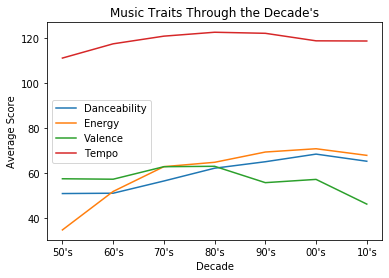

In [41]:
#Graph the traits through the decade
fiftydance = fifty_df["dnce"].mean()
sixtydance = sixty_df["dnce"].mean()
seventydance =seventy_df["dnce"].mean()
eightydance = eighty_df["dnce"].mean()
nintydance = ninty_df["dnce"].mean()
two_thousanddance = two_thousand_df["dnce"].mean()
tensdance = tens_df["dnce"].mean()

fiftyenergy = fifty_df["nrgy"].mean()
sixtyenergy = sixty_df["nrgy"].mean()
seventyenergy =seventy_df["nrgy"].mean()
eightyenergy = eighty_df["nrgy"].mean()
nintyenergy = ninty_df["nrgy"].mean()
two_thousandenergy = two_thousand_df["nrgy"].mean()
tensenergy = tens_df["nrgy"].mean()

fiftyval = fifty_df["val"].mean()
sixtyval = sixty_df["val"].mean()
seventyval =seventy_df["val"].mean()
eightyval = eighty_df["val"].mean()
nintyval = ninty_df["val"].mean()
two_thousandval = two_thousand_df["val"].mean()
tensval = tens_df["val"].mean()

fiftybpm = fifty_df["bpm"].mean()
sixtybpm = sixty_df["bpm"].mean()
seventybpm =seventy_df["bpm"].mean()
eightybpm = eighty_df["bpm"].mean()
nintybpm = ninty_df["bpm"].mean()
two_thousandbpm = two_thousand_df["bpm"].mean()
tensbpm = tens_df["bpm"].mean()

dance_df = pd.DataFrame({"Decade":["50", "60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[fiftydance, sixtydance, seventydance, eightydance, nintydance, two_thousanddance, tensdance],
                         "Energy":[fiftyenergy, sixtyenergy, seventyenergy, eightyenergy, nintyenergy, two_thousandenergy, tensenergy],
                         "Valence":[fiftyval, sixtyval, seventyval, eightyval, nintyval, two_thousandval, tensval],
                         "Tempo":[fiftybpm, sixtybpm, seventybpm, eightybpm, nintybpm, two_thousandbpm, tensbpm],})
                         

dance_df
dance_df.plot()
plt.ylabel("Average Score")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["50's", "60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

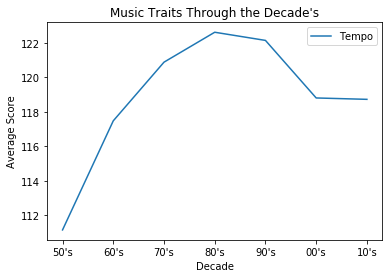

In [42]:
#Put Tempo alone because it throws off the scale
fiftybpm = fifty_df["bpm"].mean()
sixtybpm = sixty_df["bpm"].mean()
seventybpm =seventy_df["bpm"].mean()
eightybpm = eighty_df["bpm"].mean()
nintybpm = ninty_df["bpm"].mean()
two_thousandbpm = two_thousand_df["bpm"].mean()
tensbpm = tens_df["bpm"].mean()

dance_df2 = pd.DataFrame({"Tempo":[fiftybpm, sixtybpm, seventybpm, eightybpm, nintybpm, two_thousandbpm, tensbpm],})

dance_df2.plot()
plt.ylabel("Average Score")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["50's", "60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");                         

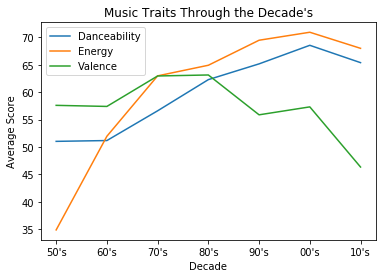

In [43]:
#Put the remaining 3 on a line chart
fiftydance = fifty_df["dnce"].mean()
sixtydance = sixty_df["dnce"].mean()
seventydance =seventy_df["dnce"].mean()
eightydance = eighty_df["dnce"].mean()
nintydance = ninty_df["dnce"].mean()
two_thousanddance = two_thousand_df["dnce"].mean()
tensdance = tens_df["dnce"].mean()

fiftyenergy = fifty_df["nrgy"].mean()
sixtyenergy = sixty_df["nrgy"].mean()
seventyenergy =seventy_df["nrgy"].mean()
eightyenergy = eighty_df["nrgy"].mean()
nintyenergy = ninty_df["nrgy"].mean()
two_thousandenergy = two_thousand_df["nrgy"].mean()
tensenergy = tens_df["nrgy"].mean()

fiftyval = fifty_df["val"].mean()
sixtyval = sixty_df["val"].mean()
seventyval =seventy_df["val"].mean()
eightyval = eighty_df["val"].mean()
nintyval = ninty_df["val"].mean()
two_thousandval = two_thousand_df["val"].mean()
tensval = tens_df["val"].mean()

fiftyval = fifty_df["val"].mean()
sixtyval = sixty_df["val"].mean()
seventyval =seventy_df["val"].mean()
eightyval = eighty_df["val"].mean()
nintyval = ninty_df["val"].mean()
two_thousandval = two_thousand_df["val"].mean()
tensval = tens_df["val"].mean()


dance_df = pd.DataFrame({"Decade":["50", "60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[fiftydance, sixtydance, seventydance, eightydance, nintydance, two_thousanddance, tensdance],
                         "Energy":[fiftyenergy, sixtyenergy, seventyenergy, eightyenergy, nintyenergy, two_thousandenergy, tensenergy],
                         "Valence":[fiftyval, sixtyval, seventyval, eightyval, nintyval, two_thousandval, tensval]})
                         

dance_df
dance_df.plot()
plt.ylabel("Average Score")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["50's", "60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

In [44]:
#Looking to see if the top Genre changes by year. Hard to make a conclusion that it does because the data sample is so small
fifty_df["top genre"].value_counts()

adult standards         33
brill building pop       9
deep adult standards     7
doo-wop                  4
merseybeat               2
louisiana blues          1
classic soul             1
british dance band       1
yodeling                 1
classic uk pop           1
british comedy           1
Name: top genre, dtype: int64

In [45]:
sixty_df["top genre"].value_counts()

adult standards           27
album rock                12
brill building pop        11
british invasion           8
art rock                   7
blues rock                 3
bebop                      2
chanson                    2
alternative country        2
blues                      1
british folk               1
art pop                    1
afrobeat                   1
drone folk                 1
cowboy western             1
classic soul               1
british blues              1
afropop                    1
boogaloo                   1
classic girl group         1
baroque pop                1
classic rock               1
australian talent show     1
avant-garde jazz           1
bubblegum pop              1
australian rock            1
appalachian folk           1
beach music                1
rock-and-roll              1
acoustic blues             1
canadian folk              1
american folk revival      1
Name: top genre, dtype: int64

In [46]:
seventy_df["top genre"].value_counts()

album rock             31
adult standards        19
glam rock              16
europop                 7
disco                   6
soft rock               4
classic soul            3
classic uk pop          3
chicago soul            2
country rock            2
dance pop               2
british folk            1
dance rock              1
pop                     1
british invasion        1
hollywood               1
brit funk               1
native american         1
country                 1
classic country pop     1
Name: top genre, dtype: int64

In [47]:
eighty_df["top genre"].value_counts()

album rock             30
dance rock             14
adult standards        13
dance pop              11
glam rock               6
mellow gold             4
europop                 3
new wave pop            3
disco                   3
eurodance               2
glam metal              2
glam punk               1
soft rock               1
jazz fusion             1
bronx hip hop           1
classic country pop     1
alternative rock        1
classic rock            1
british soul            1
classic danish pop      1
art pop                 1
art rock                1
hi-nrg                  1
bow pop                 1
Name: top genre, dtype: int64

In [48]:
ninty_df["top genre"].value_counts()

dance pop                  20
boy band                    9
bubblegum dance             9
europop                     5
eurodance                   5
g funk                      4
east coast hip hop          4
album rock                  4
canadian pop                3
british soul                2
disco house                 2
britpop                     1
german dance                1
glam metal                  1
big beat                    1
glam rock                   1
german alternative rock     1
neo mellow                  1
adult standards             1
hip hop                     1
pop                         1
disco                       1
art rock                    1
bubble trance               1
diva house                  1
classic rock                1
italian pop                 1
atl hip hop                 1
deep house                  1
Name: top genre, dtype: int64

In [49]:
two_thousand_df["top genre"].value_counts()

dance pop             42
barbadian pop          7
atl hip hop            5
bubblegum dance        4
east coast hip hop     4
big room               3
alternative metal      3
pop                    3
belgian pop            2
british soul           2
bronx hip hop          2
hip hop                2
permanent wave         2
detroit hip hop        2
celtic rock            2
boy band               2
europop                2
chicago rap            2
modern rock            1
r&b                    1
dirty south rap        1
neo mellow             1
belgian dance          1
latin                  1
disco house            1
uk garage              1
hip pop                1
Name: top genre, dtype: int64

In [50]:
tens_df["top genre"].value_counts()

dance pop                    39
big room                     10
pop                           6
canadian pop                  6
dfw rap                       5
boy band                      4
electropop                    4
electro house                 2
modern rock                   2
canadian contemporary r&b     2
neo mellow                    2
canadian hip hop              2
brostep                       2
atl hip hop                   2
aussietronica                 1
complextro                    1
alternative r&b               1
indie poptimism               1
emo rap                       1
edm                           1
australian pop                1
conscious hip hop             1
electronic trap               1
celtic rock                   1
irish pop                     1
country rap                   1
Name: top genre, dtype: int64

In [51]:
#Found another dataset with inforamtion by the decades, more data in each file. The column "target" refers to it's populartity. Was it popular when it the data was downloaded. 
# Data Files
file_patha = "group3_resources/dataset-of-60s.csv"
file_pathb = "group3_resources/dataset-of-70s.csv"
file_pathc = "group3_resources/dataset-of-80s.csv"
file_pathd = "group3_resources/dataset-of-90s.csv"
file_pathe = "group3_resources/dataset-of-00s.csv"
file_pathf = "group3_resources/dataset-of-10s.csv"


#Load Data
sixty2_df = pd.read_csv(file_patha)
seventy2_df = pd.read_csv(file_pathb)
eighty2_df = pd.read_csv(file_pathc)
ninty2_df = pd.read_csv(file_pathd)
two_thousand2_df = pd.read_csv(file_pathe)
tens2_df = pd.read_csv(file_pathf)


In [52]:
sixty2_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [53]:
sixty2_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8642.000000,8.642000e+03,8642.000000,8642.000000,8642.000000,8642.000000
mean,0.492169,0.445210,5.076487,-12.029726,0.755612,0.062402,0.615557,0.149919,0.213531,0.574963,115.125274,1.836383e+05,3.816593,38.938212,8.884286,0.500000
std,0.162179,0.220172,3.450083,4.993675,0.429749,0.098393,0.285515,0.302054,0.169466,0.273111,29.210880,1.005744e+05,0.526829,17.496059,4.329212,0.500029
min,0.000000,0.000576,0.000000,-41.643000,0.000000,0.000000,0.000005,0.000000,0.013600,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.382000,0.281000,2.000000,-14.396250,1.000000,0.032300,0.408000,0.000000,0.103000,0.361000,93.718250,1.410702e+05,4.000000,27.094223,7.000000,0.000000
50%,0.501000,0.436000,5.000000,-11.203000,1.000000,0.038700,0.683000,0.000041,0.148000,0.602500,112.372000,1.627465e+05,4.000000,35.159015,8.000000,0.500000
75%,0.612000,0.608000,8.000000,-8.611250,1.000000,0.052900,0.851000,0.036550,0.278000,0.816000,131.915250,1.932300e+05,4.000000,46.959238,10.000000,1.000000
max,0.922000,0.995000,11.000000,-0.507000,1.000000,0.960000,0.996000,0.999000,0.984000,0.993000,241.009000,2.516987e+06,5.000000,187.495630,109.000000,1.000000


In [54]:
seventy2_df.count()

track               7766
artist              7766
uri                 7766
danceability        7766
energy              7766
key                 7766
loudness            7766
mode                7766
speechiness         7766
acousticness        7766
instrumentalness    7766
liveness            7766
valence             7766
tempo               7766
duration_ms         7766
time_signature      7766
chorus_hit          7766
sections            7766
target              7766
dtype: int64

In [55]:
eighty2_df.count()

track               6908
artist              6908
uri                 6908
danceability        6908
energy              6908
key                 6908
loudness            6908
mode                6908
speechiness         6908
acousticness        6908
instrumentalness    6908
liveness            6908
valence             6908
tempo               6908
duration_ms         6908
time_signature      6908
chorus_hit          6908
sections            6908
target              6908
dtype: int64

In [56]:
ninty2_df.count()

track               5520
artist              5520
uri                 5520
danceability        5520
energy              5520
key                 5520
loudness            5520
mode                5520
speechiness         5520
acousticness        5520
instrumentalness    5520
liveness            5520
valence             5520
tempo               5520
duration_ms         5520
time_signature      5520
chorus_hit          5520
sections            5520
target              5520
dtype: int64

In [57]:
two_thousand2_df.count()

track               5872
artist              5872
uri                 5872
danceability        5872
energy              5872
key                 5872
loudness            5872
mode                5872
speechiness         5872
acousticness        5872
instrumentalness    5872
liveness            5872
valence             5872
tempo               5872
duration_ms         5872
time_signature      5872
chorus_hit          5872
sections            5872
target              5872
dtype: int64

In [58]:
tens2_df.count()

track               6398
artist              6398
uri                 6398
danceability        6398
energy              6398
key                 6398
loudness            6398
mode                6398
speechiness         6398
acousticness        6398
instrumentalness    6398
liveness            6398
valence             6398
tempo               6398
duration_ms         6398
time_signature      6398
chorus_hit          6398
sections            6398
target              6398
dtype: int64

In [59]:
#Is the correlation findings we saw in the orginal data as a group change when we look at songs by the decade Keeping in mind target is popularity
tens2_df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.069645,0.012429,0.300576,-0.057280,0.200090,-0.206865,-0.371334,-0.107581,0.494136,-0.056197,-0.224803,0.178671,-0.078254,-0.162908,0.384486
energy,0.069645,1.000000,0.028703,0.774536,0.004929,0.119194,-0.734853,-0.288263,0.231393,0.281031,0.216886,-0.009228,0.175984,-0.001224,-0.074466,0.060701
key,0.012429,0.028703,1.000000,0.010824,-0.146063,0.022796,-0.021271,-0.013049,0.021785,0.019572,0.009259,0.011028,-0.008462,0.001960,0.002512,0.005548
loudness,0.300576,0.774536,0.010824,1.000000,0.021064,0.122028,-0.648717,-0.533671,0.126807,0.324985,0.194467,-0.094598,0.207436,-0.042665,-0.111469,0.327471
mode,-0.057280,0.004929,-0.146063,0.021064,1.000000,-0.090107,0.011424,-0.037132,-0.011590,0.018198,0.032180,-0.042125,0.014125,-0.007967,-0.030129,0.032021
speechiness,0.200090,0.119194,0.022796,0.122028,-0.090107,1.000000,-0.134226,-0.148649,0.121075,0.053836,0.117813,-0.071826,0.063656,0.001857,-0.035077,0.097783
acousticness,-0.206865,-0.734853,-0.021271,-0.648717,0.011424,-0.134226,1.000000,0.315563,-0.149926,-0.166253,-0.182050,-0.039567,-0.191607,0.001477,0.024583,-0.184479
instrumentalness,-0.371334,-0.288263,-0.013049,-0.533671,-0.037132,-0.148649,0.315563,1.000000,-0.049879,-0.334662,-0.083487,0.183696,-0.133629,0.093847,0.114927,-0.499624
liveness,-0.107581,0.231393,0.021785,0.126807,-0.011590,0.121075,-0.149926,-0.049879,1.000000,-0.016562,0.038555,0.040219,0.026185,0.043099,0.008406,-0.062612
valence,0.494136,0.281031,0.019572,0.324985,0.018198,0.053836,-0.166253,-0.334662,-0.016562,1.000000,0.053572,-0.248445,0.117049,-0.103274,-0.168675,0.203774


In [60]:
two_thousand2_df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.074201,0.019733,0.292798,-0.037738,0.164758,-0.184268,-0.335961,-0.113007,0.591426,-0.141072,-0.075976,0.183014,-0.083784,-0.053724,0.458550
energy,0.074201,1.000000,0.011642,0.775731,-0.008436,0.137077,-0.743515,-0.229903,0.206668,0.286406,0.221466,-0.144524,0.164477,-0.016899,-0.167458,0.084521
key,0.019733,0.011642,1.000000,0.001610,-0.148303,0.028565,-0.012443,0.002935,-0.020165,0.016495,0.004066,0.019962,-0.003832,-0.005687,0.007625,-0.004444
loudness,0.292798,0.775731,0.001610,1.000000,0.030354,0.096448,-0.684910,-0.441705,0.120931,0.336110,0.162579,-0.164971,0.192721,-0.062935,-0.170696,0.347300
mode,-0.037738,-0.008436,-0.148303,0.030354,1.000000,-0.062829,0.011798,-0.079606,0.011895,-0.011184,0.022168,-0.034388,0.024453,-0.039702,-0.016842,0.096097
speechiness,0.164758,0.137077,0.028565,0.096448,-0.062829,1.000000,-0.059198,-0.123527,0.141157,0.147927,-0.017618,0.017786,0.031691,-0.012479,0.023737,0.057114
acousticness,-0.184268,-0.743515,-0.012443,-0.684910,0.011798,-0.059198,1.000000,0.255473,-0.099947,-0.187287,-0.157567,0.135808,-0.180854,0.015188,0.156490,-0.223842
instrumentalness,-0.335961,-0.229903,0.002935,-0.441705,-0.079606,-0.123527,0.255473,1.000000,-0.049933,-0.334772,-0.031231,0.166849,-0.104313,0.092206,0.121436,-0.471290
liveness,-0.113007,0.206668,-0.020165,0.120931,0.011895,0.141157,-0.099947,-0.049933,1.000000,-0.013835,0.041468,-0.022631,0.021770,0.021775,-0.034278,-0.075539
valence,0.591426,0.286406,0.016495,0.336110,-0.011184,0.147927,-0.187287,-0.334772,-0.013835,1.000000,0.022010,-0.140885,0.155660,-0.078661,-0.096823,0.281006


In [61]:
ninty2_df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.131832,0.022007,0.254667,-0.087036,0.206994,-0.218565,-0.337346,-0.097924,0.548994,-0.164141,-0.065589,0.178748,-0.035723,-0.077472,0.453966
energy,0.131832,1.000000,0.014851,0.759737,-0.024272,0.106341,-0.717006,-0.221905,0.173991,0.382065,0.168759,-0.097639,0.196475,-0.003553,-0.157240,0.219283
key,0.022007,0.014851,1.000000,0.001529,-0.168842,0.032672,-0.026502,-0.041967,-0.018231,0.012472,-0.031968,0.002333,-0.000061,0.020073,-0.003949,0.053454
loudness,0.254667,0.759737,0.001529,1.000000,0.007851,0.051483,-0.585624,-0.397282,0.080700,0.315454,0.119479,-0.127918,0.173517,-0.008320,-0.175665,0.334691
mode,-0.087036,-0.024272,-0.168842,0.007851,1.000000,-0.070268,0.041464,-0.043362,0.004788,-0.025817,0.020958,-0.084847,-0.016843,-0.010660,-0.075494,-0.018487
speechiness,0.206994,0.106341,0.032672,0.051483,-0.070268,1.000000,-0.094074,-0.098705,0.164986,0.075358,-0.017372,-0.041354,0.013750,0.002761,-0.055689,0.050704
acousticness,-0.218565,-0.717006,-0.026502,-0.585624,0.041464,-0.094074,1.000000,0.267370,-0.046882,-0.243543,-0.124337,0.018445,-0.177007,0.012448,0.082056,-0.374949
instrumentalness,-0.337346,-0.221905,-0.041967,-0.397282,-0.043362,-0.098705,0.267370,1.000000,-0.022999,-0.226985,0.002866,0.079972,-0.098224,0.064807,0.067846,-0.427337
liveness,-0.097924,0.173991,-0.018231,0.080700,0.004788,0.164986,-0.046882,-0.022999,1.000000,0.012929,0.022444,-0.013903,0.008246,0.073042,-0.048914,-0.102237
valence,0.548994,0.382065,0.012472,0.315454,-0.025817,0.075358,-0.243543,-0.226985,0.012929,1.000000,0.070293,-0.222331,0.168490,-0.032888,-0.198113,0.170499


In [62]:
eighty2_df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.166161,0.031154,0.196825,-0.052277,0.056490,-0.241466,-0.307968,-0.162616,0.609570,-0.092411,0.023058,0.186349,-0.019991,0.021912,0.347748
energy,0.166161,1.000000,0.045065,0.746408,-0.028187,0.145268,-0.664995,-0.181078,0.188647,0.364493,0.208639,-0.022062,0.155974,0.013331,-0.056801,0.185201
key,0.031154,0.045065,1.000000,0.035454,-0.180651,-0.003992,-0.040471,-0.003150,-0.004815,0.028986,-0.004265,0.007175,0.009912,0.031360,-0.003272,0.015615
loudness,0.196825,0.746408,0.035454,1.000000,0.012468,0.043084,-0.475267,-0.328700,0.105713,0.292653,0.140544,-0.070555,0.139126,-0.009761,-0.087884,0.248918
mode,-0.052277,-0.028187,-0.180651,0.012468,1.000000,-0.031326,0.009972,-0.061435,0.001179,0.000746,0.037377,-0.070283,0.000870,-0.042139,-0.049021,0.044977
speechiness,0.056490,0.145268,-0.003992,0.043084,-0.031326,1.000000,-0.039662,-0.006111,0.135611,-0.010153,0.025760,0.013136,0.009160,0.032715,-0.007598,-0.195129
acousticness,-0.241466,-0.664995,-0.040471,-0.475267,0.009972,-0.039662,1.000000,0.205254,-0.058258,-0.291904,-0.160443,-0.014716,-0.160182,-0.009867,0.023550,-0.292108
instrumentalness,-0.307968,-0.181078,-0.003150,-0.328700,-0.061435,-0.006111,0.205254,1.000000,-0.000175,-0.293831,-0.063820,0.043701,-0.122820,0.022472,0.027745,-0.386725
liveness,-0.162616,0.188647,-0.004815,0.105713,0.001179,0.135611,-0.058258,-0.000175,1.000000,-0.062093,0.028145,0.018598,-0.010573,0.044822,-0.012769,-0.101236
valence,0.609570,0.364493,0.028986,0.292653,0.000746,-0.010153,-0.291904,-0.293831,-0.062093,1.000000,0.138075,-0.093354,0.166539,-0.053732,-0.058313,0.262301


In [63]:
seventy2_df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.215032,0.001114,0.208268,0.021193,0.071148,-0.186496,-0.267981,-0.132664,0.626128,-0.093498,-0.106790,0.142756,-0.018867,-0.102665,0.275601
energy,0.215032,1.000000,-0.002024,0.744654,-0.013560,0.084297,-0.637992,-0.237241,0.160789,0.520042,0.224997,-0.012401,0.167981,-0.013006,-0.043197,0.241756
key,0.001114,-0.002024,1.000000,-0.015602,-0.123617,0.025151,-0.005141,-0.002166,0.010337,-0.002272,-0.001445,0.021490,0.011633,-0.002609,0.017421,-0.021019
loudness,0.208268,0.744654,-0.015602,1.000000,0.027865,-0.023911,-0.442711,-0.379182,0.107402,0.389742,0.176158,-0.042914,0.117674,-0.016834,-0.055317,0.265339
mode,0.021193,-0.013560,-0.123617,0.027865,1.000000,-0.029051,0.025311,-0.092605,0.015799,0.032563,0.050250,-0.071467,-0.008974,-0.004539,-0.064851,0.093410
speechiness,0.071148,0.084297,0.025151,-0.023911,-0.029051,1.000000,0.032701,-0.075667,0.158637,0.007708,0.043396,0.006989,-0.055995,0.023744,-0.011392,-0.127620
acousticness,-0.186496,-0.637992,-0.005141,-0.442711,0.025311,0.032701,1.000000,0.208905,0.000052,-0.358903,-0.176512,-0.010866,-0.141512,0.012077,0.010631,-0.289887
instrumentalness,-0.267981,-0.237241,-0.002166,-0.379182,-0.092605,-0.075667,0.208905,1.000000,-0.073389,-0.283312,-0.074295,0.083468,-0.052849,0.024134,0.073975,-0.371937
liveness,-0.132664,0.160789,0.010337,0.107402,0.015799,0.158637,0.000052,-0.073389,1.000000,-0.019794,0.031529,0.034530,0.003353,0.036430,0.028659,-0.036014
valence,0.626128,0.520042,-0.002272,0.389742,0.032563,0.007708,-0.358903,-0.283312,-0.019794,1.000000,0.152634,-0.152342,0.149629,-0.049056,-0.139280,0.258680


In [64]:
sixty2_df.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.349095,-0.006606,0.298229,0.072913,0.160166,-0.283972,-0.239608,-0.060480,0.662446,0.031963,-0.169707,0.213776,-0.017748,-0.142973,0.236872
energy,0.349095,1.000000,0.003742,0.748977,0.044795,-0.024364,-0.568097,-0.186577,0.139042,0.645554,0.213071,-0.080996,0.205242,0.002156,-0.082325,0.299523
key,-0.006606,0.003742,1.000000,-0.009977,-0.083163,0.034207,-0.000001,-0.024467,0.010648,-0.003881,0.012581,0.000235,0.002944,0.012012,-0.004707,0.018414
loudness,0.298229,0.748977,-0.009977,1.000000,0.074783,-0.146794,-0.388212,-0.344541,0.078104,0.508386,0.139208,-0.120009,0.132473,-0.021465,-0.100095,0.316439
mode,0.072913,0.044795,-0.083163,0.074783,1.000000,-0.014062,-0.021651,-0.125554,0.011389,0.084663,0.038588,-0.064355,-0.013471,-0.011262,-0.047983,0.193878
speechiness,0.160166,-0.024364,0.034207,-0.146794,-0.014062,1.000000,0.038474,-0.061913,0.132924,-0.007219,0.007050,0.014385,0.013825,0.006138,-0.017228,-0.133006
acousticness,-0.283972,-0.568097,-0.000001,-0.388212,-0.021651,0.038474,1.000000,0.156642,0.004113,-0.415820,-0.158973,0.040026,-0.159261,-0.004406,0.037803,-0.275892
instrumentalness,-0.239608,-0.186577,-0.024467,-0.344541,-0.125554,-0.061913,0.156642,1.000000,-0.087662,-0.278928,-0.059885,0.123042,-0.026709,0.005901,0.094470,-0.330012
liveness,-0.060480,0.139042,0.010648,0.078104,0.011389,0.132924,0.004113,-0.087662,1.000000,0.065821,0.011016,0.016813,0.007570,0.022989,0.000703,0.033234
valence,0.662446,0.645554,-0.003881,0.508386,0.084663,-0.007219,-0.415820,-0.278928,0.065821,1.000000,0.230378,-0.209133,0.225917,-0.018313,-0.171499,0.323920


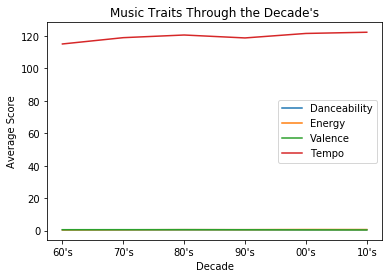

In [65]:
#When we plot this data by the decade does it look different than the previous by the decade data. Especially since this dataset is much larger. 1st grap below looks like only 2 varriables make it to the chart
#but they all did, the scale of the chart is off. 
sixtydance2 = sixty2_df["danceability"].mean()
seventydance2 =seventy2_df["danceability"].mean()
eightydance2 = eighty2_df["danceability"].mean()
nintydance2 = ninty2_df["danceability"].mean()
two_thousanddance2 = two_thousand2_df["danceability"].mean()
tensdance2 = tens2_df["danceability"].mean()

sixtyenergy2 = sixty2_df["energy"].mean()
seventyenergy2 =seventy2_df["energy"].mean()
eightyenergy2 = eighty2_df["energy"].mean()
nintyenergy2 = ninty2_df["energy"].mean()
two_thousandenergy2 = two_thousand2_df["energy"].mean()
tensenergy2 = tens2_df["energy"].mean()

sixtyval2 = sixty2_df["valence"].mean()
seventyval2 =seventy2_df["valence"].mean()
eightyval2 = eighty2_df["valence"].mean()
nintyval2 = ninty2_df["valence"].mean()
two_thousandval2 = two_thousand2_df["valence"].mean()
tensval2 = tens2_df["valence"].mean()

sixtybpm2 = sixty2_df["tempo"].mean()
seventybpm2 =seventy2_df["tempo"].mean()
eightybpm2 = eighty2_df["tempo"].mean()
nintybpm2 = ninty2_df["tempo"].mean()
two_thousandbpm2 = two_thousand2_df["tempo"].mean()
tensbpm2 = tens2_df["tempo"].mean()

dance_df2 = pd.DataFrame({"Decade":["60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[sixtydance2, seventydance2, eightydance2, nintydance2, two_thousanddance2, tensdance2],
                         "Energy":[sixtyenergy2, seventyenergy2, eightyenergy2, nintyenergy2, two_thousandenergy2, tensenergy2],
                         "Valence":[sixtyval2, seventyval2, eightyval2, nintyval2, two_thousandval2, tensval2],
                         "Tempo":[sixtybpm2, seventybpm2, eightybpm2, nintybpm2, two_thousandbpm2, tensbpm2],})
                         

dance_df2
dance_df2.plot()
plt.ylabel("Average Score")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

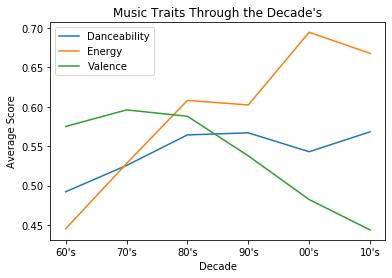

In [66]:
sixtydance2 = sixty2_df["danceability"].mean()
seventydance2 =seventy2_df["danceability"].mean()
eightydance2 = eighty2_df["danceability"].mean()
nintydance2 = ninty2_df["danceability"].mean()
two_thousanddance2 = two_thousand2_df["danceability"].mean()
tensdance2 = tens2_df["danceability"].mean()

sixtyenergy2 = sixty2_df["energy"].mean()
seventyenergy2 =seventy2_df["energy"].mean()
eightyenergy2 = eighty2_df["energy"].mean()
nintyenergy2 = ninty2_df["energy"].mean()
two_thousandenergy2 = two_thousand2_df["energy"].mean()
tensenergy2 = tens2_df["energy"].mean()

sixtyval2 = sixty2_df["valence"].mean()
seventyval2 =seventy2_df["valence"].mean()
eightyval2 = eighty2_df["valence"].mean()
nintyval2 = ninty2_df["valence"].mean()
two_thousandval2 = two_thousand2_df["valence"].mean()
tensval2 = tens2_df["valence"].mean()


dance_df2 = pd.DataFrame({"Decade":["60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[sixtydance2, seventydance2, eightydance2, nintydance2, two_thousanddance2, tensdance2],
                         "Energy":[sixtyenergy2, seventyenergy2, eightyenergy2, nintyenergy2, two_thousandenergy2, tensenergy2],
                         "Valence":[sixtyval2, seventyval2, eightyval2, nintyval2, two_thousandval2, tensval2]})
                         

dance_df2
dance_df2.plot()
plt.ylabel("Average Score")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

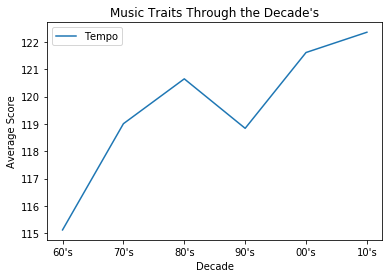

In [67]:
sixtybpm2 = sixty2_df["tempo"].mean()
seventybpm2 =seventy2_df["tempo"].mean()
eightybpm2 = eighty2_df["tempo"].mean()
nintybpm2 = ninty2_df["tempo"].mean()
two_thousandbpm2 = two_thousand2_df["tempo"].mean()
tensbpm2 = tens2_df["tempo"].mean()

dance_df3 = pd.DataFrame({"Tempo":[sixtybpm2, seventybpm2, eightybpm2, nintybpm2, two_thousandbpm2, tensbpm2]})
                         

dance_df3
dance_df3.plot()
plt.ylabel("Average Score")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");

In [68]:
sixty2_df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [69]:
#To fix the sacle on the chart using the larger dataset, used the MinMaxScaler to make tempo and loudness on the same scale of the other varriables. This also make it more relative to eachother.
from sklearn.preprocessing import MinMaxScaler
dfsixty = sixty2_df
scaler = MinMaxScaler(feature_range=(0,1))
dfsixty[["tempo","loudness"]] = scaler.fit_transform(dfsixty[["tempo","loudness"]])

dfseventy = seventy2_df 
scaler = MinMaxScaler(feature_range=(0,1))
dfseventy[["tempo","loudness"]] = scaler.fit_transform(dfseventy[["tempo","loudness"]])

dfeighty = eighty2_df
scaler = MinMaxScaler(feature_range=(0,1))
dfeighty[["tempo","loudness"]] = scaler.fit_transform(dfeighty[["tempo","loudness"]])

dfninty = ninty2_df
scaler = MinMaxScaler(feature_range=(0,1))
dfninty[["tempo","loudness"]] = scaler.fit_transform(dfninty[["tempo","loudness"]])

dftwo_thousand = two_thousand2_df 
scaler = MinMaxScaler(feature_range=(0,1))
dftwo_thousand[["tempo","loudness"]] = scaler.fit_transform(dftwo_thousand[["tempo","loudness"]])

dftens = tens2_df
scaler = MinMaxScaler(feature_range=(0,1))
dftens[["tempo","loudness"]] = scaler.fit_transform(dftens[["tempo","loudness"]])
dftens.head()



,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,0.899432,0,0.0886,0.02000,0.000,0.0828,0.706,0.400098,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,0.687954,0,0.0346,0.87100,0.814,0.0946,0.250,0.676658,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,0.862211,0,0.0520,0.16100,0.000,0.1080,0.274,0.773251,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,0.880682,0,0.0527,0.00513,0.000,0.2040,0.291,0.305743,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,0.919516,1,0.2750,0.00381,0.000,0.3910,0.780,0.705958,144244,4,24.99199,8,1


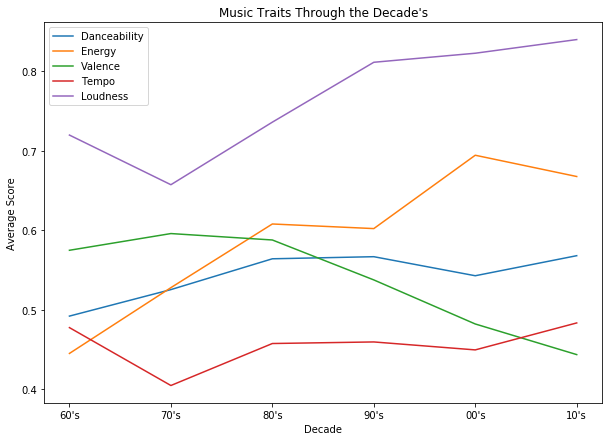

In [70]:
#Final Plot
sixtydance2 = sixty2_df["danceability"].mean()
seventydance2 =seventy2_df["danceability"].mean()
eightydance2 = eighty2_df["danceability"].mean()
nintydance2 = ninty2_df["danceability"].mean()
two_thousanddance2 = two_thousand2_df["danceability"].mean()
tensdance2 = tens2_df["danceability"].mean()

sixtyenergy2 = sixty2_df["energy"].mean()
seventyenergy2 =seventy2_df["energy"].mean()
eightyenergy2 = eighty2_df["energy"].mean()
nintyenergy2 = ninty2_df["energy"].mean()
two_thousandenergy2 = two_thousand2_df["energy"].mean()
tensenergy2 = tens2_df["energy"].mean()

sixtyval2 = sixty2_df["valence"].mean()
seventyval2 =seventy2_df["valence"].mean()
eightyval2 = eighty2_df["valence"].mean()
nintyval2 = ninty2_df["valence"].mean()
two_thousandval2 = two_thousand2_df["valence"].mean()
tensval2 = tens2_df["valence"].mean()

sixtybpm2 = dfsixty["tempo"].mean()
seventybpm2 =dfseventy["tempo"].mean()
eightybpm2 = dfeighty["tempo"].mean()
nintybpm2 = dfninty["tempo"].mean()
two_thousandbpm2 = dftwo_thousand["tempo"].mean()
tensbpm2 = dftens["tempo"].mean()

sixtyld2 = dfsixty["loudness"].mean()
seventyld2 =dfseventy["loudness"].mean()
eightyld2 = dfeighty["loudness"].mean()
nintyld2 = dfninty["loudness"].mean()
two_thousandld2 = dftwo_thousand["loudness"].mean()
tensld2 = dftens["loudness"].mean()

dance_df2 = pd.DataFrame({"Decade":["60", "70", "80", "90", "2000", "2010"],
                         "Danceability":[sixtydance2, seventydance2, eightydance2, nintydance2, two_thousanddance2, tensdance2],
                         "Energy":[sixtyenergy2, seventyenergy2, eightyenergy2, nintyenergy2, two_thousandenergy2, tensenergy2],
                         "Valence":[sixtyval2, seventyval2, eightyval2, nintyval2, two_thousandval2, tensval2],
                         "Tempo":[sixtybpm2, seventybpm2, eightybpm2, nintybpm2, two_thousandbpm2, tensbpm2],
                         "Loudness":[sixtyld2, seventyld2, eightyld2, nintyld2, two_thousandld2, tensld2]})
                         

dance_df2
dance_df2.plot(figsize=(10,7))
plt.ylabel("Average Score")
plt.xlabel("Decade")
plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Music Traits Through the Decade's");
plt.savefig('output.png')

In [71]:
#Looking to see how many songs in each decade dataset were popular or not popular
dftens["target"].value_counts()

1    3199
0    3199
Name: target, dtype: int64

In [72]:
dftwo_thousand["target"].value_counts()

1    2936
0    2936
Name: target, dtype: int64

In [73]:
dfninty["target"].value_counts()

1    2760
0    2760
Name: target, dtype: int64

In [74]:
dfeighty["target"].value_counts()

1    3454
0    3454
Name: target, dtype: int64

In [75]:
dfseventy["target"].value_counts()

1    3883
0    3883
Name: target, dtype: int64

In [76]:
dfsixty["target"].value_counts()

1    4321
0    4321
Name: target, dtype: int64

In [77]:
#Just wanted to see key by decade to see how it changed over time. Didn't drop the other columns, just exploring the data
dfsixty3 = dfsixty.groupby(["key"]).count()
dfsixty3

,track,artist,uri,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
key,,,,,,,,,,,,,,,,,,
0,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
1,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512,512
2,955,955,955,955,955,955,955,955,955,955,955,955,955,955,955,955,955,955
3,425,425,425,425,425,425,425,425,425,425,425,425,425,425,425,425,425,425
4,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678,678
5,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
6,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319
7,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124,1124
8,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516


In [78]:
dfseventy3 = dfseventy.groupby(["key"]).count()
dfseventy3

,track,artist,uri,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
key,,,,,,,,,,,,,,,,,,
0,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016
1,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421,421
2,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045,1045
3,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222,222
4,687,687,687,687,687,687,687,687,687,687,687,687,687,687,687,687,687,687
5,759,759,759,759,759,759,759,759,759,759,759,759,759,759,759,759,759,759
6,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286,286
7,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
8,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380,380


In [79]:
dfeighty3 = dfeighty.groupby(["key"]).count()
dfeighty3

,track,artist,uri,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
key,,,,,,,,,,,,,,,,,,
0,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912,912
1,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480,480
2,852,852,852,852,852,852,852,852,852,852,852,852,852,852,852,852,852,852
3,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217,217
4,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604
5,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576,576
6,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312,312
7,819,819,819,819,819,819,819,819,819,819,819,819,819,819,819,819,819,819
8,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284,284


In [80]:
dfninty3 = dfninty.groupby(["key"]).count()
dfninty3

,track,artist,uri,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
key,,,,,,,,,,,,,,,,,,
0,646,646,646,646,646,646,646,646,646,646,646,646,646,646,646,646,646,646
1,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491,491
2,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563
3,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194
4,423,423,423,423,423,423,423,423,423,423,423,423,423,423,423,423,423,423
5,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489,489
6,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373,373
7,709,709,709,709,709,709,709,709,709,709,709,709,709,709,709,709,709,709
8,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313


In [81]:
dftwo_thousand3 = dftwo_thousand.groupby(["key"]).count()
dftwo_thousand3

,track,artist,uri,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
key,,,,,,,,,,,,,,,,,,
0,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632,632
1,623,623,623,623,623,623,623,623,623,623,623,623,623,623,623,623,623,623
2,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620,620
3,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
4,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479
5,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455,455
6,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414,414
7,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637,637
8,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407,407


In [82]:
dftens3 = dftens.groupby(["key"]).count()
dftens3

,track,artist,uri,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
key,,,,,,,,,,,,,,,,,,
0,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715,715
1,751,751,751,751,751,751,751,751,751,751,751,751,751,751,751,751,751,751
2,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584,584
3,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
4,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452,452
5,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507,507
6,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513,513
7,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682
8,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445,445


In [83]:
#Merge Test
merge_df = pd.merge(dfsixty3[['track']], dfseventy3[['track']], on="key",)
merge_df

,track_x,track_y
key,,
0,1209,1016
1,512,421
2,955,1045
3,425,222
4,678,687
5,1004,759
6,319,286
7,1124,991
8,516,380


In [84]:
#Merged the Keys by the decade into one file
merge_df2 = pd.merge(merge_df, dfeighty3[['track']], on="key")
merge_df3 = pd.merge(merge_df2, dfninty3[['track']], on="key")
merge_df4 = pd.merge(merge_df3, dftwo_thousand3[['track']], on="key")
merge_df5 = pd.merge(merge_df4, dftens3[['track']], on="key")
merge_df5.columns = ["60", "70", "80", "90", "00", "10"]
merge_df5
merge_df5
decadecol = pd.DataFrame({"realkey":["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]})
total = merge_df5.reset_index()


In [85]:
total

,key,60,70,80,90,00,10
0,0,1209,1016,912,646,632,715
1,1,512,421,480,491,623,751
2,2,955,1045,852,563,620,584
3,3,425,222,217,194,176,196
4,4,678,687,604,423,479,452
5,5,1004,759,576,489,455,507
6,6,319,286,312,373,414,513
7,7,1124,991,819,709,637,682
8,8,516,380,284,313,407,445
9,9,852,1023,913,563,558,560


In [86]:
decadecol
finalcount = pd.merge(total,decadecol, right_index=True, left_index=True )
finalcount

,key,60,70,80,90,00,10,realkey
0,0,1209,1016,912,646,632,715,C
1,1,512,421,480,491,623,751,C#
2,2,955,1045,852,563,620,584,D
3,3,425,222,217,194,176,196,D#
4,4,678,687,604,423,479,452,E
5,5,1004,759,576,489,455,507,F
6,6,319,286,312,373,414,513,F#
7,7,1124,991,819,709,637,682,G
8,8,516,380,284,313,407,445,G#
9,9,852,1023,913,563,558,560,A


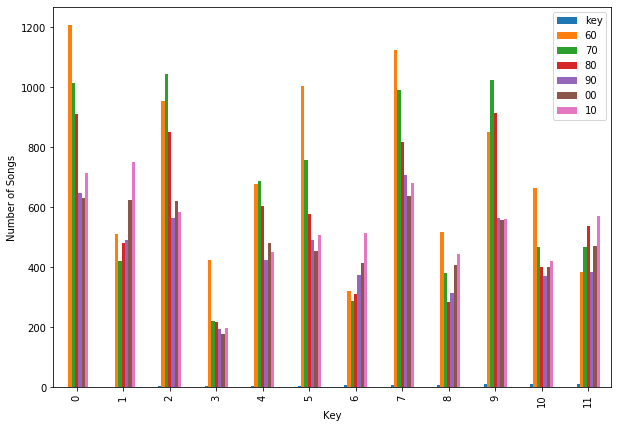

<Figure size 432x288 with 0 Axes>

In [87]:
#Ploted to see if it looks interesting before doing any cleanup to hard to read, messed around with other ides but decided not to do this.
key_chart = finalcount.plot(kind='bar', figsize=(10,7))

plt.xlabel("Key")
plt.ylabel("Number of Songs")

plt.show()
plt.tight_layout()


In [88]:
#wanted to see a line chart like we did previously but by popular vs unpopular songs
dfsixty2 = dfsixty.groupby(["target"]).mean()
dfsixty4 = dfsixty2.drop(['key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'], axis = 1)
dfseventy2 = dfseventy.groupby(["target"]).mean()
dfseventy4 = dfseventy2.drop(['key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'], axis = 1)
dfeighty2 = dfeighty.groupby(["target"]).mean()
dfeighty4 = dfeighty2.drop(['key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'], axis = 1)
dfninty2 = dfninty.groupby(["target"]).mean()
dfninty4 = dfninty2.drop(['key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'], axis = 1)
dftwo_thousand2 = dftwo_thousand.groupby(["target"]).mean()
dftwo_thousand4 = dftwo_thousand2.drop(['key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'], axis = 1)
dftens2 = dftens.groupby(["target"]).mean()
dftens4 = dftens2.drop(['key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms', 'time_signature', 'chorus_hit', 'sections'], axis = 1)

decadedef = pd.DataFrame({"year": ["60", "60", "70", "70", "80","80", "90", "90", "00", "00", "10", "10"],
                         "target": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]})


frames= [dfsixty4, dfseventy4, dfeighty4, dfninty4, dftwo_thousand4, dftens4]
result = pd.concat(frames)



In [89]:
#reset my index
results2 = result.reset_index()
results2

,target,danceability,energy,loudness,valence,tempo
0,0,0.453756,0.379267,0.681475,0.486502,0.462671
1,1,0.530582,0.511152,0.758299,0.663424,0.492690
2,0,0.480631,0.471024,0.629159,0.527134,0.401488
3,1,0.570370,0.584880,0.685719,0.664852,0.408245
4,0,0.504073,0.563043,0.706446,0.518783,0.450852
5,1,0.624444,0.653031,0.765806,0.657061,0.464510
6,0,0.485017,0.546950,0.775838,0.493754,0.465297
7,1,0.648769,0.657542,0.847068,0.581617,0.454025
8,0,0.455812,0.674414,0.786270,0.410734,0.457643
9,1,0.630049,0.714608,0.859395,0.553791,0.441672


In [90]:
#merged on index and then reset the index to year 
final = pd.merge(results2,decadedef, right_index=True, left_index=True )
final2 = final.drop(['target_y'], axis = 1)
final3 = final2.set_index(['year'])
final3

,target_x,danceability,energy,loudness,valence,tempo
year,,,,,,
60,0,0.453756,0.379267,0.681475,0.486502,0.462671
60,1,0.530582,0.511152,0.758299,0.663424,0.492690
70,0,0.480631,0.471024,0.629159,0.527134,0.401488
70,1,0.570370,0.584880,0.685719,0.664852,0.408245
80,0,0.504073,0.563043,0.706446,0.518783,0.450852
80,1,0.624444,0.653031,0.765806,0.657061,0.464510
90,0,0.485017,0.546950,0.775838,0.493754,0.465297
90,1,0.648769,0.657542,0.847068,0.581617,0.454025
00,0,0.455812,0.674414,0.786270,0.410734,0.457643


In [91]:
#Called only Unpopluar Data and Plot
unpop = final3.loc[final3["target_x"] == 0]
unpop2 = unpop.drop(['target_x'], axis = 1)

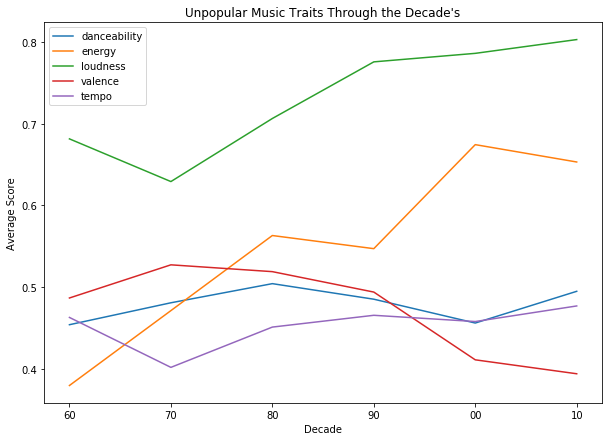

In [92]:
unpop2.plot(figsize=(10,7))
plt.ylabel("Average Score")
plt.xlabel("Decade")
#plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Unpopular Music Traits Through the Decade's");
plt.savefig('Unpop_output.png')

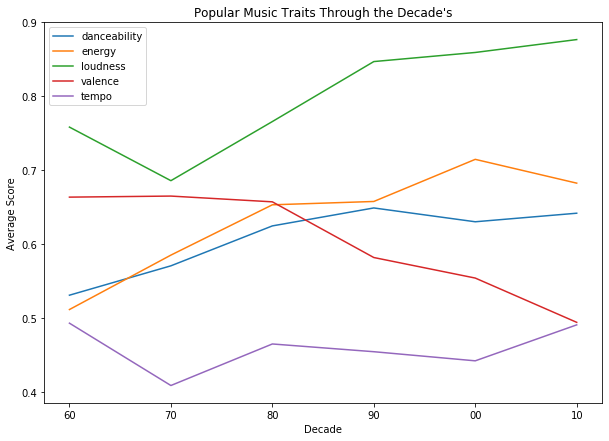

In [93]:
#Called only Popluar Data and Plot
pop = final3.loc[final3["target_x"] == 1]
pop2 = pop.drop(['target_x'], axis = 1)

pop2.plot(figsize=(10,7))
plt.ylabel("Average Score")
plt.xlabel("Decade")
#plt.xticks([0, 1, 2, 3, 4, 5], ["60's", "70's", "80's", "90's", "00's", "10's"])
plt.title("Popular Music Traits Through the Decade's");
plt.savefig('pop_output.png')

Additional information on target:
    '0' Implies that the track is a 'flop'.
    The author's condition of a track being 'flop' is as follows:

        - The track must not appear in the 'hit' list of that decade.
        - The track's artist must not appear in the 'hit' list of that decade.
        - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
        - The track's genre must not have a song in the 'hit' list.
        - The track must have 'US' as one of its markets.
        
This inforamtion about popularity aka target was provided by the documentation on Kaggle where I downloaded the data.